## Eksempel (Svingninger)

La oss ta for oss eksempel 9.9.3 i læreboken MIP. Vi ser for oss et lodd med masse $M$, som henger i en fjær med stivhet $k$. Vi antar at loddet blir trukket nedover og så blir sluppet. Formelen som beskriver hvordan loddets posisjon, $x$, varierer med tiden, $t$, kan beskrives av funksjonen:

$$
M x'' + \alpha x' + kx = 0,
$$

hvor $\alpha$ representerer luftmotstanden. Ved teorem 9.9.1 i læreboken kan vi finne en analytisk løsning til denne differensiallikningen. Skal vi derimot løse likningen numerisk ved hjelp av Eulers metode, kan vi innføre variabelen $y = x'$, og skrive differensiallikningen som et system:

$$
x' = y
$$

$$
y' = -\frac{\alpha}{M} y - \frac{k}{M} x
$$

### Oppgave

**Vis mellomregningene som trenges til personen ved siden av deg. Hva er $f(t, x, y)$ og $g(t, x, y)$ her?**

Vi tar nå utgangspunkt i at $M = 1$, $\alpha = 0.2$ og $k = 1$. I tillegg har vi initialbetingelsene $x(0) = 1$ og $x'(0) = 0$. Vi bruker koden vår til å løse dette problemet.

In [1]:
import numpy as np

def euler_method(f, g, t0, tn, x0, y0, n):
  """
  Anvender Eulers metode for å løse differensialligningen x' = f(t, x, y) og y' = g(t, x, y).

  Args:
    f: Funksjonen som representerer x-delen av høyre side av differensialligningen.
    g: Funksjonen som representerer y-delen av høyre side av differensialligningen.
    t0: Startverdien for t.
    tn: Sluttverdien for t.
    x0: Startverdien for x.
    y0: Startverdien for y.
    n: Antall steg.

  Returns:
    En NumPy array som inneholder de approksimerte verdiene for x i hvert steg,
    En NumPy array som inneholder de approksimerte verdiene for y i hvert steg,
  """

  # Lager en array med t-verdier fra t0 til tn med n+1 punkter
  t_values = np.linspace(t0, tn, n + 1)
  # Initialiserer listene for x- og y-verdiene med startverdiene
  x_values = [x0]
  y_values = [y0]
  # Beregner steglengden
  delta_t = t_values[1] - t_values[0]

  # Gjennomfører Eulers metode for hvert steg
  for i in range(n):
    # Beregner neste x-verdi
    x_next = x_values[-1] + delta_t * f(t_values[i], x_values[-1], y_values[-1])
    # Beregner neste y-verdi
    y_next = y_values[-1] + delta_t * g(t_values[i], x_values[-1], y_values[-1])
    # Legger til de nye verdiene i listene
    x_values.append(x_next)
    y_values.append(y_next)

  # Returnerer t-verdiene og de beregnede x- og y-verdiene som NumPy arrays
  return t_values, np.array(x_values), np.array(y_values)

In [2]:
# Innfører M, alpha og k
M = 1
alpha = 0.2
k = 1

# Definerer funksjonene f og g

def f(t, x, y):
  return y

def g(t, x, y):
  return -(alpha* y + k * x) / M

In [3]:
# Seter initialverdier og parametre.
# Prøv å se hva som skjer når de forandres
t0 = 0   # Første t-verdi
x0 = 1  # Iinital x-verdi
y0 = 0
tn = 20  # Siste t-verdi
n = 10000   # Antall steg

# Anvend Eulers metode
t_values, x_values, y_values = euler_method(f, g, t0, tn, x0, y0, n)

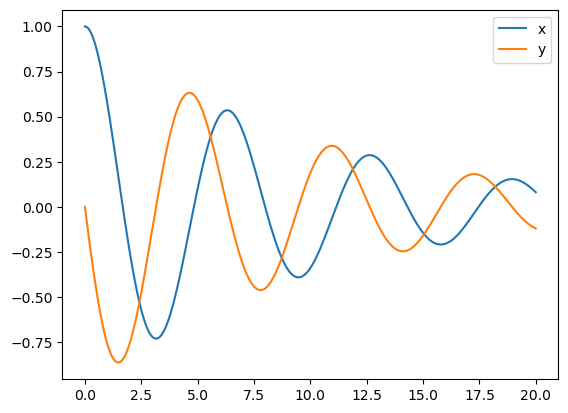

In [4]:
import matplotlib.pyplot as plt

plt.plot(t_values, x_values, label='x')
plt.plot(t_values, y_values, label='y')
plt.legend()

## Oppgave

**Gi en beskrivelse av hva figuren under forteller om løsningen til differensialligningen**

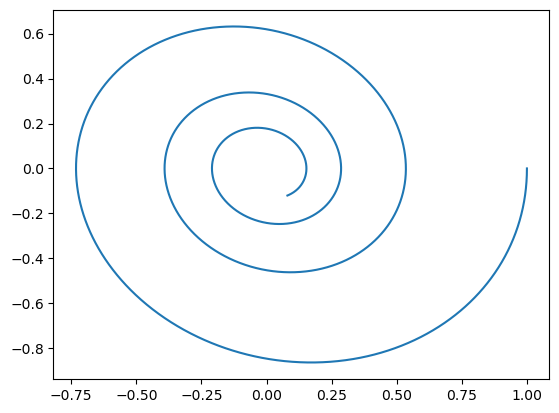

In [5]:
plt.plot(x_values, y_values);

## Analytisk løsning

Vi kan løse denne differensialligning analytisk. Koden under gjør det. Vi trenger ikke bry oss om å forstå den analytiske løsningen og koden for den.

In [6]:
# Denne løsningen bygger på
# https://math.libretexts.org/Courses/Cosumnes_River_College/Math_420%3A_Differential_Equations_(Breitenbach)/06%3A_Applications_of_Linear_Second_Order_Equations/6.02%3A_Spring-Mass_Problems_(With_Damping)

import numpy as np

def analytisk_svingning(M, alpha, k, t0, x0, y0):
    """
    Beregner den analytiske løsningen for en dampet harmonisk oscillator.

    Denne funksjonen løser en differensialligning som beskriver bevegelsen til et system
    bestående av en masse (M) festet til en fjær med konstant (k), hvor systemet er
    dempet av en faktor (alpha). Avhengig av verdien av diskriminanten, vil løsningen være
    enten eksponentielt avtagende, oscillerende, eller kritisk dempet.

    Args:
        M (float): Massens verdi (kg).
        alpha (float): Dempingsfaktoren (kan være positiv).
        k (float): Fjærkonstanten (N/m).
        t0 (float): Starttidspunkt (s).
        x0 (float): Startposisjon (m).
        y0 (float): Starthastighet (m/s).

    Returns:
        tuple: To funksjoner (x, y) som beskriver posisjon og hastighet over tid.
            - x(t) (funksjon): Posisjonen til systemet som funksjon av tid t.
            - y(t) (funksjon): Hastigheten til systemet som funksjon av tid t.

    Løsningene er basert på verdien av diskriminanten D:
        - Hvis D > 0 (to reelle røtter): Løsningene for x(t) og y(t) er eksponentielt avtagende.
        - Hvis D < 0 (komplekse røtter): Løsningene for x(t) og y(t) inneholder en oscillasjon med demping.
        - Hvis D = 0 (kritisk demping): Løsningene for x(t) og y(t) er lineære med eksponentiell avtagning.
    """
    # Beregner p og q som er nødvendige for å løse den analytiske løsningen
    p = k / M  # p = k/M
    q = alpha / M  # q = alpha/M

    # Beregner diskriminanten D (D = q^2 - 4p), som avgjør type løsning
    D = q**2 - 4*p

    if D > 0:
        # Når D er positiv, finnes to forskjellige løsninger for eksponentiell vekst
        # Beregn røttene lambda1 og lambda2 ved hjelp av funksjonene ff og gg
        lambda1 = ff(1, q, p)  # Første rot (lambda1)
        lambda2 = gg(1, q, p)  # Andre rot (lambda2)

        # Beregn konstantene C1 og C2 basert på initialbetingelsene (x0, y0)
        C2 = (y0 - lambda1 * x0) / (lambda2 - lambda1)  # Beregn C2
        C1 = x0 - C2  # Beregn C1

        # Definerer funksjonen x(t) som beskriver bevegelsen over tid
        def x(t):
            s = t - t0  # Tidsskift (forsinkelse i tid)
            return C1 * np.exp(lambda1 * s) + C2 * np.exp(lambda2 * s)  # Løsning for x(t)

        # Definerer funksjonen y(t) som beskriver bevegelsen over tid for y
        def y(t):
            s = t - t0  # Tidsskift
            return C1 * np.exp(lambda1 * s) * lambda1 + C2 * np.exp(lambda2 * s) * lambda2  # Løsning for y(t)

    elif D < 0:
        # Når D er negativ, er løsningen en oscillering (komplekse røtter)
        omega = np.sqrt(-D) / 2  # Beregner den oscillerende frekvensen (omega)

        # Beregn konstantene C1 og C2 basert på initialbetingelsene (x0, y0)
        C2 = (y0 + (q * x0) / 2) / omega  # Beregn C2
        C1 = x0  # Sett C1 lik x0

        # Definerer funksjonen x(t) som beskriver bevegelsen over tid med oscillasjon
        def x(t):
            s = t - t0  # Tidsskift
            return np.exp(-q * s / 2) * (C1 * np.cos(omega * s) + C2 * np.sin(omega * s))  # Løsning for x(t)

        # Definerer funksjonen y(t) som beskriver bevegelsen over tid for y
        def y(t):
            s = t - t0  # Tidsskift
            return - 0.5 * q * x(t) + omega * np.exp(-q * s / 2) * (-C1 * np.sin(omega * s) + C2 * np.cos(omega * s))  # Løsning for y(t)

    else:
        # Når D er null, er løsningen kritisk demping (en rot)
        C1 = x0  # Sett C1 lik x0
        C2 = y0 + (2 * x0) / q  # Beregn C2

        # Definerer funksjonen x(t) som beskriver bevegelsen over tid med kritisk demping
        def x(t):
            s = t - t0  # Tidsskift
            return np.exp(-q * s / 2) * (C1 + C2 * s)  # Løsning for x(t)

        # Definerer funksjonen y(t) som beskriver bevegelsen over tid for y
        def y(t):
            s = t - t0  # Tidsskift
            return np.exp(-q * s / 2) * (-0.5 * q * (C1 + C2*s) + C2)  # Løsning for y(t)

    # Returnerer funksjonene x(t) og y(t) som kan brukes til å beregne bevegelsen over tid
    return x, y

In [7]:
# Prov å se hva som skjer med større og mindre verdier for n

n = 1000   # Antall steg

# Anvend Eulers metode
t_values, x_values, y_values = euler_method(f, g, t0, tn, x0, y0, n)

In [8]:
x, y = analytisk_svingning(M, alpha, k, t0, x0, y0)

In [9]:
t_analytisk = np.linspace(t0, tn, 200)
x_analytisk = x(t_analytisk)
y_analytisk = y(t_analytisk)


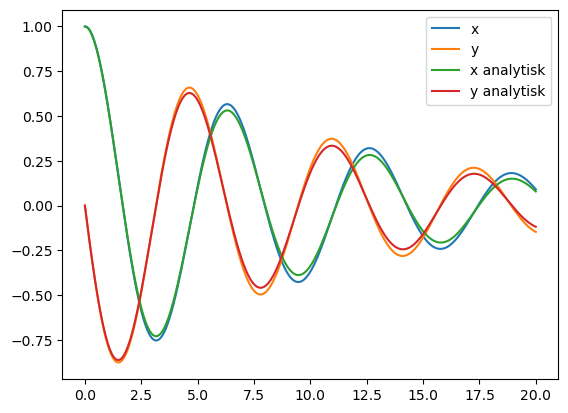

In [10]:
plt.plot(t_values, x_values, label='x')
plt.plot(t_values, y_values, label='y')
plt.plot(t_analytisk, x_analytisk, label='x analytisk')
plt.plot(t_analytisk, y_analytisk, label='y analytisk')
plt.legend()